In [133]:
# Importering av alla nödvändiga paket

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols

# läser in filen
filepath = 'auto-mpg.csv'
cars = pd.read_csv(filepath)
cars = cars.dropna()

## Introduktion

Detta är då en introduktion till min rapport och vad den kommer att handla om. Jag har valt att undersöka auto-mpg datasetet, och kommer att göra analyser och tester kring de flesta rubrikerna/kolonnerna och använda mig av de metoder vi har lärt oss för att komma fram till dessa analyser och slutsatser

In [115]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Categorized_HP
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,Medium
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,Medium
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,Medium
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,Medium
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,Medium
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,Low
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,Low
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,Low
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,Low


## Undersökning 1

Det första jag tänkte att vi skulle analysera är deskriptiva mått för några av kolonnerna, och därifrån räkna ut bla. median, medelvärdet och standardavvikelsen.

För median används detta tänk. (1 , 2, 3, 4, 5, 6) medianen är här mellan 3 och 4 alltså 3,5

för medelvärdet används denna sats: ${\bar x}=\frac{1}{n}\sum_{i=1}^{n}x_i=\frac{x_1+\dots+x_n}{n}$

för variansen används denna sats: $s^2=\frac{1}{n-1}\sum_{i=1}^{n}\left(x_i-{\bar x}\right)^2=\frac{1}{n-1}\left(\sum_{i=1}^{n}x_i^2-n\left({\bar x}\right)^2\right)$

för standardavvikelsen räknar man: $s=\sqrt{s^2}$

In [77]:
# för kolonnen "mpg"
med_mpg = np.median(cars["mpg"])

mean_mpg = np.mean(cars['mpg'])

var_mpg = np.var(cars['mpg'], ddof=1)

std_mpg = np.std(cars['mpg'], ddof=1)

print(f"medianen: {med_mpg}, medelvärdet: {mean_mpg}, varians: {var_mpg}, standardavvikelse: {std_mpg}")


medianen: 22.75, medelvärdet: 23.445918367346938, varians: 60.91814186544184, standardavvikelse: 7.8050074865717995


In [78]:
# för kolonnen acceleration
med_acc = cars['acceleration'].median()

mean_acc = cars['acceleration'].mean()

var_acc = cars['acceleration'].var()

std_acc = cars['acceleration'].std()

print(f"medianen: {med_acc}, medelvärdet: {mean_acc}, variansen: {var_acc}, standardavvikelse: {std_acc}")

medianen: 15.5, medelvärdet: 15.541326530612244, variansen: 7.611331228143431, standardavvikelse: 2.758864119188082


In [79]:
# för kolonnen "weight" men bara för de bilar med över 4000 kg

filtered_cars_weight = cars[cars['weight'] > 4000]

filtered_med = np.median(filtered_cars_weight['weight'])

filtered_mean = np.mean(filtered_cars_weight['weight'])

filtered_var = np.var(filtered_cars_weight['weight'], ddof=1)

filtered_std = np.std(filtered_cars_weight['weight'], ddof=1)

print(f"medianen: {filtered_med}, medelvärdet: {filtered_mean}, variansen: {filtered_var}, standardavvikelsen: {filtered_std}")

medianen: 4357.0, medelvärdet: 4398.59375, variansen: 74312.34027777778, standardavvikelsen: 272.60289851316287


In [80]:
filtered_cars_weight['weight'].describe()

count      64.000000
mean     4398.593750
std       272.602899
min      4042.000000
25%      4183.750000
50%      4357.000000
75%      4530.250000
max      5140.000000
Name: weight, dtype: float64

här tänkte jag också att vi plottar en av analyserna, som också visar vart medianen och medelvärdet ligger:

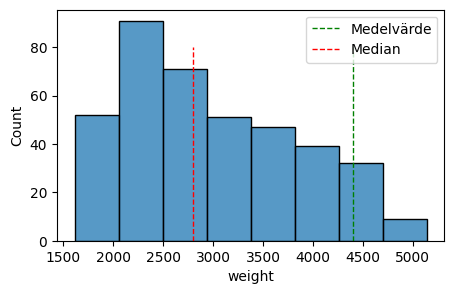

In [81]:
fig, ax = plt.subplots(figsize=(5,3))
sns.histplot(cars, x='weight', bins=8);

filtered_mean = filtered_cars_weight['weight'].mean() 
filtered_med = cars['weight'].median()
plt.plot([filtered_mean, filtered_mean], [0, 80], color='green', linestyle='--', linewidth=1, label='Medelvärde')
plt.plot([filtered_med, filtered_med], [0, 80], color='red', linestyle='--', linewidth=1, label='Median')

leg = plt.legend(loc='upper right') 
plt.show()

## Undersökning 2

Som nästa analys tänkte jag att vi skulle titta på medelvikten på bilar med namnet 'chevrolet impala', och konstruera ett 95% konfidensintervall för det:

In [113]:
# gör ett subset för chevrolet impala
impala = cars[cars['name'] == 'chevrolet impala']

Här beräknas konfidensintervallet för kategorin "impala", med ett 95% konfidensnivå:

In [114]:
# Börjar med att räkna ut medelvärdet, standardavvikelsen och n
mean_impala = np.mean(impala['weight'])
std_impala = np.std(impala['weight'], ddof=1)
n_impala = len(impala['weight'])

# beräkna sedan konfidensnivå och kritiskt t-värde
alpha_impala = 0.05
t_crit_impala = t.ppf(1-alpha_impala/2, n_impala-1)
sem_impala = std_impala / np.sqrt(n_impala)

# beräknar övre och undre konfidensintervall
upper = mean_impala - t_crit_impala * sem_impala 
lower = mean_impala + t_crit_impala * sem_impala

print('Confidence interval (\u03B1=0.05) for average weight of \'chevrolet impala\': ' + str(round(mean_impala,1)) + ' \u00B1 ' + str(round(t_crit_impala*sem_impala,1)))

Confidence interval (α=0.05) for average weight of 'chevrolet impala': 4458.5 ± 579.0


vi kan då se här att det finns en övre konfidens nivå: 4458,5 men även en undre: 579

## Undersökning 3

som en nästa undersökning tänkte jag att vi utför ett hypotestest, om mindre än 1/3 av alla bilar är från efter 1980. Här kommer en signifikansnivå på 95% användas och även standardnormalfördelning

Alternativhypotes:

$H_A: p < 1/3$

nollhypotes:

$H_0: p \geq 1/3$

In [126]:
cars_after_1980 = len(cars[cars['model_year'] > 80])
total_cars = len(cars)
alpha = 0.05
expected_num_cars = (1/3) * total_cars

cars_std = np.std(expected_num_cars)

z_value = cars_after_1980 - expected_num_cars / cars_std 

p_value = 2 * (1 - scs.norm.cdf(abs(z_value)))

if p_value < alpha:
    print("Nollhypotesen avvisas: Färre än 1/3 av alla bilar är från efter 1980.")
else:
    print("Nollhypotesen accepteras: Mer än 1/3 av alla bilar är från efter 1980.")


Nollhypotesen avvisas: Färre än 1/3 av alla bilar är från efter 1980.


C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_6104\265445040.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  z_value = cars_after_1980 - expected_num_cars / cars_std


Här får vi då reda på att det är färre än 1/3 av alla bilar som är från efter 1980, vilket också är rimligt med tänke på tidsspannet

För att bevisa detta mer, kan vi ta en  titt på denna graf:

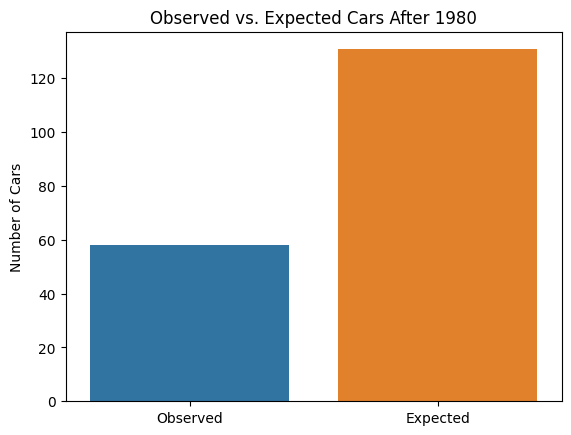

In [127]:
data = pd.DataFrame({'Observed': [cars_after_1980], 'Expected': [expected_num_cars]})

# Skapa en barplot med Seaborn.
sns.barplot(data=data)
plt.title("Observed vs. Expected Cars After 1980")
plt.ylabel("Number of Cars")
plt.show()

där vi kan se att orange "Expected value", är 1/3, medans den blåa som är det faktiska antalet bilar som tillverkades efer 1980.

## Undersökning 4

I denna undersökning tänkte jag att vi skulle undersöka med hjälp av linjär reggression, hur "horsepower" påverkar "mpg". Alltså hur påverkar ökande hästkrafter bränsleförbrukningen mellan de bilar vi har i datasetet?

Vi börjar med att utföra en korrelationsanalys för att mäta styrka och riktning för sambandet, med pearsons korrelationskoefficient:

In [175]:
r,p=scs.pearsonr(cars['horsepower'], cars['mpg'])
print(r, p)

-0.7784267838977759 7.031989029405036e-81


Scatterplot för att visa sambandet:

<Axes: xlabel='horsepower', ylabel='mpg'>

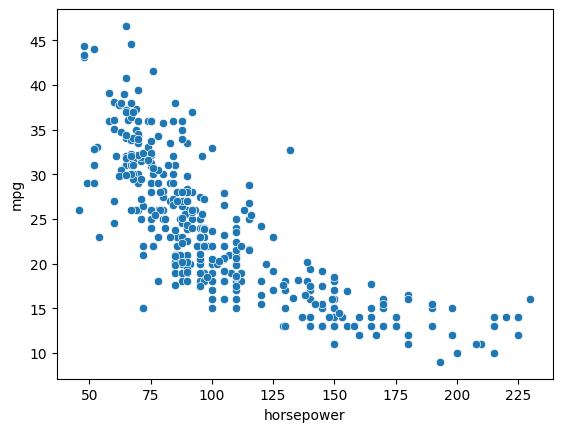

In [140]:
sns.scatterplot(data=cars, x="horsepower", y="mpg")

Här görs en linjär regression för att rita en linje till vår scatterplot ovan:

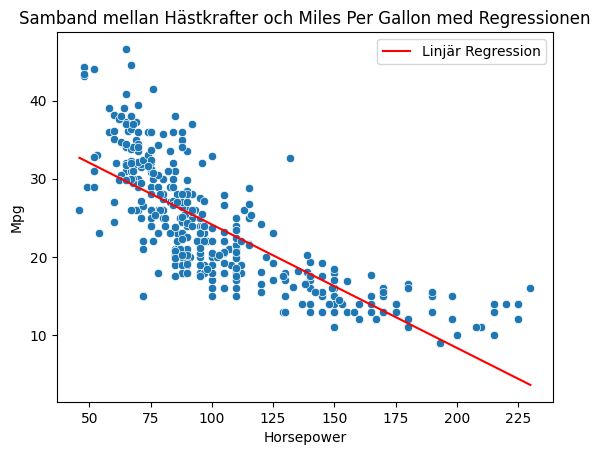

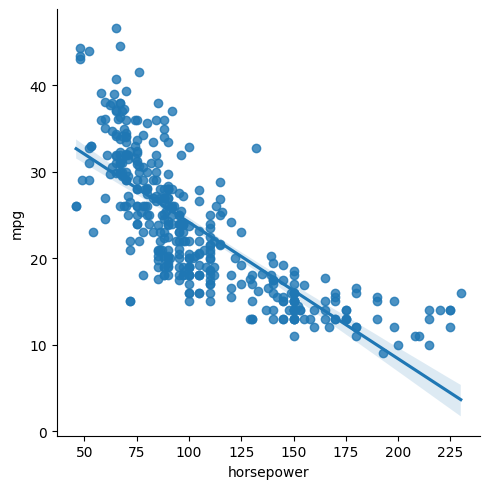

In [176]:
slope, intercept, r_value, p_value, std_err = scs.linregress(cars['horsepower'], cars['mpg'])

# värderna för x och y
x_values = np.linspace(cars['horsepower'].min(), cars['horsepower'].max(), 100)

y_values = slope * x_values + intercept

# Själva plotten
sns.scatterplot(data=cars, x='horsepower', y='mpg')

# Gör linjen röd
plt.plot(x_values, y_values, color='red', label='Linjär Regression')

plt.title("Samband mellan Hästkrafter och Miles Per Gallon med Regressionen")
plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.legend()

plt.show()

sns.lmplot(data=cars, x='horsepower', y='mpg')


Med hjälp av dessa visualiseringar kan vi nu se att bränsleeffiktiviteten minskar när hästkrafterna ökar, och tvärtom. det ser vi på lutningen av linjen. 

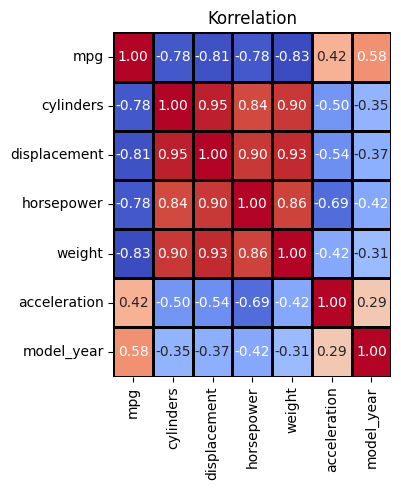

In [168]:
numeric_data = cars.select_dtypes(include=[float, int])

# Beräkna korrelationsmatrisen
corr = numeric_data.corr()

# heatmaps för korrelationerna.
plt.figure(figsize=(10, 5))
plt.subplot(131)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", cbar=False, linewidths=1, linecolor='black')
plt.title("Korrelation")

plt.tight_layout()
plt.show()